In [1]:
import numpy as np
#import gym
import sys
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib


%matplotlib inline
#fig, ax = plt.subplots(figsize=(20, 10)) 
#fig, ax = plt.subplots(figsize=(18, 2))
#ax.imshow(random.rand(8, 90), interpolation='nearest')
#tight_layout()

#fig = matplotlib.pyplot.gcf()
#fig.set_size_inches(20,20)

sys.path.append('../src')
sys.path.append('../src/envs')
sys.path.append('../src/game_generator')
sys.path.append('../src/agents')
sys.path.append('../src/utils')
sys.path.append('../trained_models')

def showim(buffer):
    fig, ax = plt.subplots(figsize=(9, 9))
    #ax.imshow(random.rand(8, 90), interpolation='nearest')
    ax.imshow(buffer,interpolation='nearest',aspect='auto')

In [2]:
from four_in_a_row_env import FourInARowEnv
from four_dqn_agent import DQNAgent
from simulation import Experiment
from utils import helper

Using TensorFlow backend.


In [6]:
npc_button_color = 1
npc_agent = DQNAgent( board_size = (6,7), 
                     action_size = 7, 
                     my_button_color=npc_button_color, 
                     model_name='NN_128x16', 
                     continue_model =False)

agent_button_color = -1
agent = DQNAgent( board_size = (6,7), 
                 action_size = 7, 
                 my_button_color=agent_button_color, 
                 model_name=None, 
                 continue_model =True)

helper.show_trainable_params( agent.model.model)

Loaded model from disk : ../trained_models/four_a_row/NN_128x16
Loaded model from disk : ../trained_models/four_a_row/NN_128x16
Total params: 7,687
Trainable params: 7,687
Non-trainable params: 0


In [7]:
env = FourInARowEnv(npc_agent=npc_agent)
#env = FourInARowEnv(npc_agent=None)


In [5]:
#state = env.reset()

In [6]:
#agent.act(state)

In [7]:
#env.step(5)

<IPython.core.display.Javascript object>


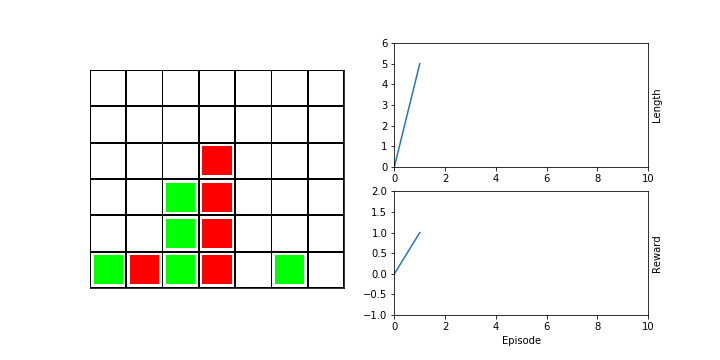

In [19]:
interactive = True
%matplotlib nbagg

#agent = DQNAgent(8 , 4*4)
#agent = DQNAgent(8 , 4)


experiment = Experiment(env, agent, debug_print_interval=200)
agent.epsilon = 0
experiment.run_agent( max_number_of_episodes=1, max_number_of_steps=100, interactive = True, display_frequency=10)#
#experiment.run_qlearning( max_number_of_episodes=5000,  interactive = False, display_frequency=200)

# updating npc

In [ ]:

interactive = True
%matplotlib nbagg

#agent = DQNAgent(8 , 4*4)
#agent = DQNAgent(8 , 4)

round = 10

for r in range(round):
    print('round : ' + str(r))
    npc_button_color = 1
    npc_agent = DQNAgent( board_size = (6,7), 
                         action_size = 7, 
                         my_button_color=npc_button_color, 
                         model_name='NN_128x16', 
                         continue_model =False)

    agent_button_color = -1
    agent = DQNAgent( board_size = (6,7), 
                     action_size = 7, 
                     my_button_color=agent_button_color, 
                     model_name=None, 
                     continue_model =True)

    env = FourInARowEnv(npc_agent=npc_agent)

    experiment = Experiment(env, agent, debug_print_interval=200)
    #agent.epsilon = 0
    #experiment.run_agent( max_number_of_episodes=1, max_number_of_steps=100, interactive = True, display_frequency=10)#
    experiment.run_qlearning( max_number_of_episodes=10000,  interactive = False, display_frequency=200)

round : 0
Loaded model from disk : ../trained_models/four_a_row/NN_128x16


<IPython.core.display.Javascript object>

episode : 0
Saved model to disk : ../trained_models/four_a_row/NN_128x16
episode : 200
Saved model to disk : ../trained_models/four_a_row/NN_128x16
episode : 400
Saved model to disk : ../trained_models/four_a_row/NN_128x16
episode : 600
Saved model to disk : ../trained_models/four_a_row/NN_128x16
episode : 800
Saved model to disk : ../trained_models/four_a_row/NN_128x16
episode : 1000
Saved model to disk : ../trained_models/four_a_row/NN_128x16


In [15]:
agent.epsilon_min = 0.1

In [18]:
agent.epsilon

0.09995093964326238

In [19]:
agent.epsilon = 0

(array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]]), 5, 1)


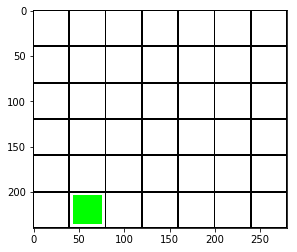

In [11]:
state = env.reset()
print(state)

imshow(env.render(mode='rgb_array'))

In [50]:
agent.act( state[0])   # player = -1


1

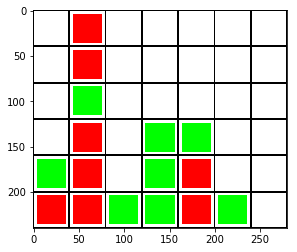

In [48]:
state = env.manual_step( action=1
                        , player=-1)
imshow(env.render(mode='rgb_array'))
#print(state[0])

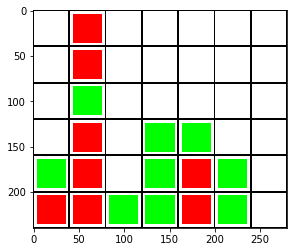

In [49]:
state = env.manual_step( action=5
                        , player=1)
imshow(env.render(mode='rgb_array'))
#print(state[0])

In [66]:
state[0]

(array([[ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0]]), 4, 3)

In [21]:
agent.epsilon = 0

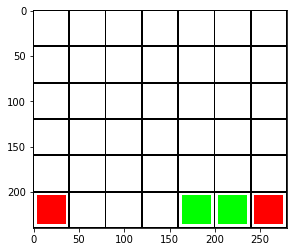

In [6]:
env.step( 0)
imshow(env.render(mode='rgb_array'))

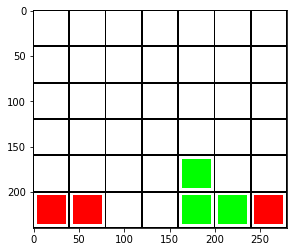

In [7]:
state = env.step(1 )
imshow(env.render(mode='rgb_array'))
if state[2]:
    print('!!!!!!!!!!!!!!!****')
    print('!!!!!!!!!!!!!!!****')
    print('!!!!!!!!!!!!!!!****')

In [68]:
env.step( 3)

((array([[ 0,  0,  0, -1,  0,  0,  1],
         [-1,  0,  0,  1,  0,  0, -1],
         [-1,  1,  0, -1,  1, -1, -1],
         [ 1, -1,  1,  1,  1, -1,  1],
         [ 1,  1, -1, -1, -1,  1, -1],
         [-1,  1, -1,  1, -1,  1,  1]]), 0, 3), 0, False, '')

In [9]:
env.step( 4)

check win
(-1, 4, 4)
check win
(1, 3, 4)


((array([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  1,  0,  0],
         [ 0,  0,  0, -1, -1,  0,  1],
         [ 1,  1,  0,  1, -1, -1, -1]]), 4, 4), 0, False, '')

In [10]:
env.step( 5)

check win
(-1, 4, 5)
check win
(1, 3, 3)


((array([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  1,  1,  0,  0],
         [ 0,  0,  0, -1, -1, -1,  1],
         [ 1,  1,  0,  1, -1, -1, -1]]), 4, 5), 0, False, '')

In [11]:
env.step( 2)

check win
(-1, 5, 2)
check win
(1, 4, 1)


((array([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  1,  1,  0,  0],
         [ 0,  1,  0, -1, -1, -1,  1],
         [ 1,  1, -1,  1, -1, -1, -1]]), 5, 2), 0, False, '')

In [12]:
env.step( 2)

check win
(-1, 4, 2)


((array([[ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  0,  1,  1,  0,  0],
         [ 0,  1, -1, -1, -1, -1,  1],
         [ 1,  1, -1,  1, -1, -1, -1]]), 4, 2), 1, True, '')

In [22]:
a = np.random.randint( -1 , 1 , ( 6,7) ).astype(int)

In [18]:
env.board

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0, -1],
       [ 1,  1,  0,  0,  1,  1, -1],
       [ 1,  1,  1, -1, -1, -1, -1]])

In [17]:
for i in range( 0 , env.in_row_count):
    a = np.sum( env.board[ 4, i:i+env.in_row_count]) == (4 * env.in_row_count )
    print(env.board[ 4, i:i+env.in_row_count])
    print (a)

env.board[4, :]

[1 1 0 0]
False
[1 0 0 1]
False
[0 0 1 1]
False
[ 0  1  1 -1]
False


array([ 1,  1,  0,  0,  1,  1, -1])

In [12]:
env.board

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  0, -1],
       [ 1,  1,  0,  0,  1,  1, -1],
       [ 1,  1,  1, -1, -1, -1, -1]])

In [36]:
np.where( a[0,:] == 0)


(array([0, 4, 6], dtype=int64),)

In [29]:
a

array([[ 0,  1, -1, -1,  0, -1,  0],
       [-1,  0,  0,  0, -1,  0, -1],
       [ 0, -1,  0, -1,  0, -1, -1],
       [ 0,  0,  0, -1,  0, -1,  0],
       [-1,  0, -1,  0, -1, -1,  0],
       [-1, -1,  0,  0, -1,  0,  0]])

In [19]:
import random

In [21]:
random.choice( [0,1])

1

In [5]:
np.prod(( 6, 7))

42